<a href="https://colab.research.google.com/github/Aditigoswami3/MDAI/blob/main/gan_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
tf.__version__

'2.15.0'

In [ ]:
device ="cuda"

In [ ]:
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
len
(
X_train
)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train
[
90
]

[90]

In [ ]:
y_train.shape
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

12343
4


<function matplotlib.pyplot.show(close=None, block=None)>

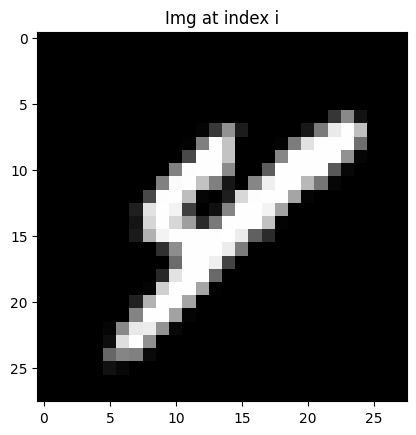

In [ ]:
i = np.random.randint(0,60000)
print(i)
print(y_train[i])
plt.imshow(X_train[i],cmap ="gray")
plt.title("Img at index i")
plt.show

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_train[0].min(), X_train[0].max()

(0.0, 255.0)

In [ ]:
X_train = (X_train-127.5)/ 127.5

In [ ]:
X_train[0].min(), X_train[0].max()

(-1.0, 1.0)

In [ ]:
buffer_size = 60000
batch_size = 256
buffer_size/batch_size

234.375

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train

array([[[[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        ...,

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]]],


       [[[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [

In [ ]:
X_train

array([[[[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        ...,

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]]],


       [[[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [

In [ ]:
def build_generator():

  #Step 1:
  network = tf.keras.Sequential()     # default class to buid neural network using Tenserflow

  #Step 2: adding layers to dense NN
  network.add(layers.Dense(units=7*7*256 , use_bias = False, input_shape = (100,)))

  #step 3: apply normalization calc
  network.add(layers.BatchNormalization())

  #step 4: Add Activation layer
  network.add(layers.LeakyReLU())

  #step 5: Reshape for next layer
  network.add(layers.Reshape((7,7,256)))

  #step 6: to upscale cnn layer using Conv2DTranspose

  #7*7*128 (Hidden layer 1)
  network.add(layers.Conv2DTranspose(filters=128, kernel_size=(5,5), padding='same', use_bias = False ))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  #14*14*64
  network.add(layers.Conv2DTranspose(filters=64, kernel_size=(5,5), padding ='same', strides=(2,2), use_bias = False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  #28*28*1 (output layer )
  network.add(layers.Conv2DTranspose(filters=1 , kernel_size=(5,5), padding ='same', strides=(2,2), use_bias = True, activation = 'tanh'))

  network.summary()

  return network

In [ ]:
generator= build_generator()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 12544)             1254400   
                                                                 
 batch_normalization_12 (Ba  (None, 12544)             50176     
 tchNormalization)                                               
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_12 (Conv2  (None, 7, 7, 128)         819200    
 DTranspose)                                                     
                                                                 
 batch_normalization_13 (Ba  (None, 7, 7, 128)        

In [ ]:
generator.input

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_7_input')>

In [ ]:
noise=tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-0.2287714 , -0.31625196,  2.9310944 , -1.2063259 ,  0.625092  ,
         0.28018674,  0.31611195,  1.2022496 ,  1.8707796 ,  0.49548516,
        -0.4916546 , -0.55053   , -1.4741819 ,  0.33218798, -0.43651715,
        -1.4169377 , -0.05463019, -0.04784762, -0.4422113 ,  1.7975674 ,
        -0.51864535, -0.61455667, -1.639613  ,  0.5819032 , -1.1375742 ,
        -0.54847145,  1.582125  ,  0.3729733 ,  0.6913867 , -0.85540384,
        -0.93198323, -0.5434792 , -0.6106521 ,  0.2975674 , -0.32081535,
         0.07619406, -0.6940826 , -0.1565633 ,  0.67402476, -1.7259072 ,
        -1.2437484 ,  0.18101308, -0.4505032 , -1.8014352 , -1.6747906 ,
         0.7247924 , -0.32016638,  0.05696648, -0.55709106, -0.3774761 ,
        -0.8958403 ,  1.6334938 ,  1.6844656 ,  0.8916119 , -0.49125496,
        -0.9492794 , -1.3441806 , -0.3790429 ,  0.1245248 , -1.0088501 ,
         2.4059184 ,  0.38320103, -1.8354385 , -1.1831685 ,  1.361731  ,
 

In [ ]:
generated_image = generator(noise, training=False)

In [ ]:
generated_image.shape

TensorShape([1, 28, 28, 1])

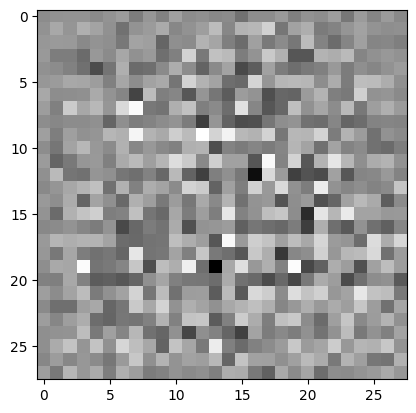

In [ ]:
plt.imshow(generated_image[0, :,:,0], cmap="gray")

In [ ]:
def build_discriminator():
  #Step 1:
  network = tf.keras.Sequential()     # default class to buid neural network using Tenserflow

  #Step 2: to downscale cnn layer using Conv2D

  # 14*14*64
  network.add(layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', strides = (2,2), input_shape = [28,28,1] ))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))     #dropout done to avoid obverfitting in neural net

  #7*7*128
  network.add(layers.Conv2D(filters=128, kernel_size=(5,5), padding='same', strides = (2,2) ))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  #converting matrix to vector
  network.add(layers.Flatten())

  #next to use only 1 neron for output
  network.add(layers.Dense(1))

  network.summary()
  return network

In [ ]:
discriminator=  build_discriminator()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_23 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 dropout_8 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_3 (Flatten)         (None, 6272)             

In [ ]:
discriminator.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_8_input')>

In [ ]:
discriminator(generated_image, training=False)  #here we test discriminator with image generated by generator

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00300417]], dtype=float32)>

we apply activation function to translate it to probabilities

In [ ]:
tf.sigmoid(-0.00285281)   #output gives 0.49 ie 50% probability for image to be right

<tf.Tensor: shape=(), dtype=float32, numpy=0.4992868>

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

In [ ]:
def discriminator_loss(expected_output, fake_output):
  #compute the loss for real images by comparing them to a tensor of ones(real labels).
  real_loss= cross_entropy(tf.ones_like(expected_output), expected_output)
  #since real images are equivalent to one. For this reason, we are comparing the expected outputs , the real images with number ones.
  fake_loss=cross_entropy(tf.zeroes_like(fake_output), fake_output)
  #calculate the total discriminator loss by summing the real and fake losses.
  total_loss= real_loss + fake_loss
  return total_loss

In [ ]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)
discriminator_optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)

In [ ]:
epoch = 100
noise_dimension= 100
number_of_images= 16

In [ ]:
batch_size, noise_dimension

(256, 100)

In [ ]:
@tf.function
def train(images):
  noise = tf.random.normal([batch_size, noise_dimension])

  # gradient calc
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:

    #generate fake imgs
    generated_images = generator(noise, training=True)

    #calc disc output
    expected_output = discriminator(images, training = True)
    fake_output = discriminator(generated_images, training = True)

    #calc losses
    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(expected_output, fake_output)

    #gradient cal
    gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #application of gradient using optimizer
    generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))

In [ ]:
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
tf.config.run_functions_eagerly(True)
X_train_batch = X_train.as_numpy_iterator().next()
train(X_train_batch)

AttributeError: 'numpy.ndarray' object has no attribute 'as_numpy_iterator'

In [ ]:
test_images = tf.random.normal([number_of_images, noise_dimension])
test_images.shape

In [ ]:
60000 / 256

In [ ]:
generated_images =[]
def train_gan(dataset, epochs, test_images):
  for epoch in range(epochs):
    #print(epoch)
    for image_batch in dataset:
      #print(image_batch.shape)
      train(image_batch)

    print('Epoch: ', epoch + 1)
    generated_images = generator(test_images, training = False)
    fig = plt.figure(figsize = (10,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i + 1)  # The subplot method has 3 arguments: rows, columns and index of the current plot.
      plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
    plt.show()

In [ ]:
train_gan(X_train, epochs, test_images)